Instructions:


1.   Run first cell, restart session
2.   Run 3 next cells, comment all 4 cells
3.   Run all notebook 15 times



In [ ]:
# to save plotly graphs
# !pip install -U kaleido # Runtime > Restart session

In [ ]:
# import pandas as pd
# from google.colab import drive

# drive.mount('/content/drive/')

In [ ]:
# def f2d(float_num):
#   return "{:.2f}".format(float_num)

In [ ]:
# model_index = 0
# with_update = True # CAN'T be False with model_index = 0 (arima)

---
#Loading data

In [ ]:
folder = '/content/drive/My Drive/TCC/results/'
latex_folder = '/content/drive/My Drive/TCC/latex/'

MODEL_NAMES = [
    'arima', # ........ 0 - update_mode CAN'T be False!
    'lstm', # ......... 1
    'mlp', # .......... 2
    'dlinear', # ...... 3
    'nlinear', # ...... 4
    'informer', # ..... 5
    'autoformer', # ... 6
    'fedformer' # ..... 7
]

model_name = MODEL_NAMES[model_index]
update_mode = '-with_update' if with_update else '-without_update'

print('Analizing ' + model_name.upper() + update_mode + ' model')

m6_df = pd.read_csv(folder + '../notebooks/m6dataset.csv')
test_df = m6_df.iloc[-7:].reset_index(drop=True)
exec_df = pd.read_csv(folder + model_name + update_mode + '-exec_time.csv')
#metrics_df = pd.read_csv(folder + model_name + update_mode + '-metrics.csv') # will be recalculated
pred_df = pd.read_csv(folder + model_name + update_mode + '-pred.csv')
resources_df = pd.read_csv(folder + model_name + update_mode + '-resources.txt')
#val_df = pd.read_csv(folder + model_name + update_mode + '-val.csv') # same as test_df

update_mode = '.u' if with_update else ''
if with_update:
  model_index = model_index + 1
with_update = not with_update

Analizing FEDFORMER-with_update model


---
#Resources

In [ ]:
exec_df

,Model,Cell Start,Cell Stop,Cell Elapsed,Note Start,Note Stop
0,fedformer,2024-09-05 02:04:00.752372,2024-09-05 02:47:03.431021,0 days 00:43:02.678649,2024-09-05 02:03:55.131998,2024-09-05 02:47:04.081254


In [ ]:
# filter resource consumption: cpu %, cpu mem, gpu %, gpu mem
import datetime
from datetime import timedelta

row_0 = exec_df.iloc[0]
cell_start = datetime.datetime.strptime(row_0.iloc[1], '%Y-%m-%d %H:%M:%S.%f')
cell_stop = datetime.datetime.strptime(row_0.iloc[2], '%Y-%m-%d %H:%M:%S.%f')
cell_elapsed = datetime.datetime.strptime(row_0.iloc[3].replace('0 days ', ''), '%H:%M:%S.%f')
note_start = datetime.datetime.strptime(row_0.iloc[4], '%Y-%m-%d %H:%M:%S.%f')
note_stop = datetime.datetime.strptime(row_0.iloc[5], '%Y-%m-%d %H:%M:%S.%f')

# Convert the 'Time' column to datetime objects
resources_df['Time'] = pd.to_datetime(resources_df['Time'])

tdelta = timedelta(seconds=2)

# Filter res_df to keep only rows within the specified time range.
filtered_res_df = resources_df[(resources_df['Time'] >= (cell_start - tdelta)) & (resources_df['Time'] <= (cell_stop + tdelta))]
filtered_res_df.reset_index(drop=True)
filtered_res_df

# prompt: Using dataframe filtered_res_df: create a new ffres dataframe with every missing second and use the value pf the row above
new_index = pd.date_range(start=filtered_res_df['Time'].min(), end=filtered_res_df['Time'].max(), freq='S')
ffres_df = pd.DataFrame(index=new_index)
ffres_df = pd.merge(ffres_df, filtered_res_df, how='left', left_index=True, right_on='Time')
ffres_df = ffres_df.fillna(method='ffill')
ffres_df = ffres_df.rename(columns={'GPU Used Memory (GB)': 'GPU Used Memory (MB)'})
ffres_df.reset_index(drop=True, inplace=True)
ffres_df

<ipython-input-417-f2bf89c5e717>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffres_df = ffres_df.fillna(method='ffill')


,Time,CPU Usage (%),Used Memory (GB),GPU Usage (%),GPU Used Memory (MB),GPU Power (W)
0,2024-09-05 02:03:59,24.6,1.19,0.0,2.0,8.90
1,2024-09-05 02:04:00,24.6,1.19,0.0,2.0,8.90
2,2024-09-05 02:04:01,50.0,1.30,0.0,2.0,8.89
3,2024-09-05 02:04:02,56.7,1.39,0.0,2.0,8.89
4,2024-09-05 02:04:03,56.7,1.39,0.0,2.0,8.89
...,...,...,...,...,...,...
2582,2024-09-05 02:47:01,31.1,2.73,11.0,256.0,30.01
2583,2024-09-05 02:47:02,33.9,2.73,11.0,256.0,30.11
2584,2024-09-05 02:47:03,33.9,2.73,11.0,256.0,30.11
2585,2024-09-05 02:47:04,4.8,2.73,0.0,186.0,26.07


In [ ]:
# prompt: Using dataframe ffres_df: print max values from columns 1 to 5

selected_columns = ffres_df.iloc[:, 1:]

# Find the maximum value for each column in the selected columns
max_values = selected_columns.max()
min_values = selected_columns.min()
# print('Max values of each resource:')
# print(max_values)
# print()
# print('Min values of each resource:')
# print(min_values)
# print()
print('Diff for each resource:')
diff_values = max_values - min_values
print(diff_values)

Diff for each resource:
CPU Usage (%)            98.40
Used Memory (GB)          2.72
GPU Usage (%)            46.00
GPU Used Memory (MB)    737.00
GPU Power (W)            59.17
dtype: float64


In [ ]:
# prompt: Using dataframe ffres_df: calculate total consumed gpu power and print with 2 decimals

# Calculate the total GPU power consumed
total_gpu_power = ffres_df['GPU Power (W)'].sum() / 3600

# Print the total GPU power with 2 decimal places
print(f"Total GPU power consumption: {total_gpu_power:.2f} watt-hour")

Total GPU power consumption: 25.89 watt-hour


In [ ]:
# prompt: create a new dataframe benchmark_df if it wasnt created yet
try:
  benchmark_df
except NameError:
  benchmark_df = pd.DataFrame(columns=['model', 'cpusage', 'mem_gb', 'gpusage', 'gpumem_gb', 'gpu_power_wh', 'exec_time'])
  latex_benchmark_df = pd.DataFrame(columns=['model', 'cpusage', 'mem_gb', 'gpusage', 'gpumem_gb', 'gpu_power_wh', 'exec_time'])

new_bench_row = {'model': model_name.upper() + update_mode, 'cpusage': diff_values.iloc[0], 'mem_gb': diff_values.iloc[1],
                 'gpusage': diff_values.iloc[2], 'gpumem_gb': diff_values.iloc[3]/1024, 'gpu_power_wh': total_gpu_power,
                 'exec_time': (cell_stop - cell_start).seconds}

new_latex_bench_row = {'model': model_name.upper() + update_mode, 'cpusage': f2d(diff_values.iloc[0]), 'mem_gb': f2d(diff_values.iloc[1]),
                 'gpusage': f2d(diff_values.iloc[2]), 'gpumem_gb': f2d(diff_values.iloc[3]/1024), 'gpu_power_wh': f2d(total_gpu_power),
                 'exec_time': cell_elapsed.strftime('%M:%S')}

benchmark_df = benchmark_df._append(new_bench_row, ignore_index=True)
latex_benchmark_df = latex_benchmark_df._append(new_bench_row, ignore_index=True)

benchmark_df

,model,cpusage,mem_gb,gpusage,gpumem_gb,gpu_power_wh,exec_time
0,ARIMA.u,91.9,0.77,0.0,0.000000,0.746689,306
1,LSTM,98.4,2.17,93.0,2.339844,4.798594,270
2,LSTM.u,75.0,2.47,90.0,1.163086,31.257944,1846
3,MLP,98.4,1.61,19.0,0.250000,1.047514,145
4,MLP.u,98.4,2.40,18.0,0.403320,7.951192,1063
5,DLINEAR,98.4,1.60,8.0,0.240234,1.057147,156
6,DLINEAR.u,98.4,2.10,6.0,0.360352,7.873475,1136
7,NLINEAR,98.4,1.55,6.0,0.212891,0.931806,145
8,NLINEAR.u,87.1,2.17,6.0,0.360352,7.230233,1040
9,INFORMER,98.3,1.95,61.0,0.556641,8.295717,565


In [ ]:
# prompt: Using dataframe benchmark_df: create copy_df function to copy only with model and another column,
# order by this column, and transform it according to a lambda function
import time

def copy_df(df, column_name, order_ascending=True):

    new_df = df[['model', column_name]].copy()
    new_df = new_df.sort_values(by=[column_name], ascending=order_ascending)
    #new_df[column_name] = new_df[column_name].apply(transform_function)
    return new_df

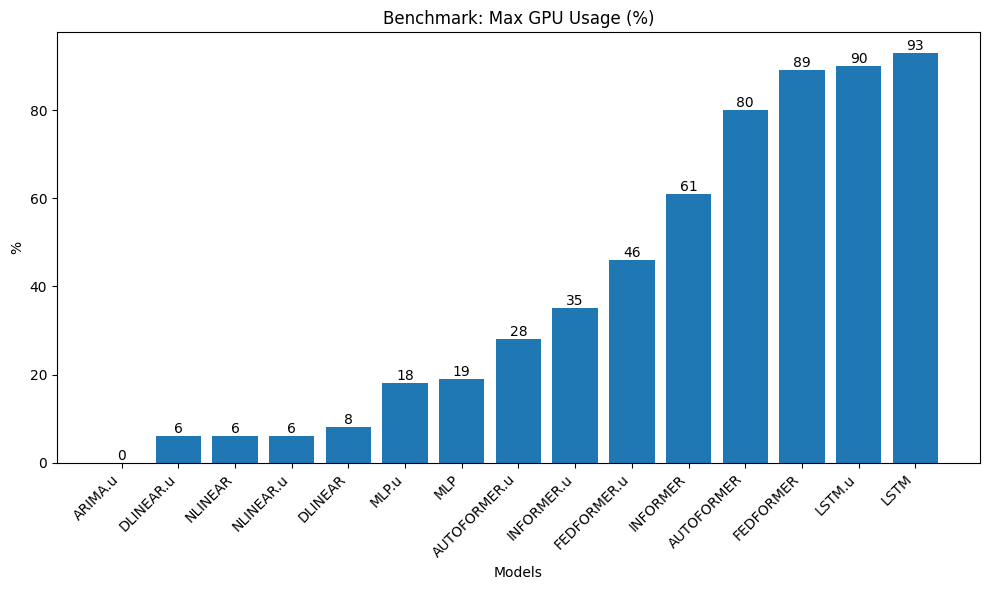

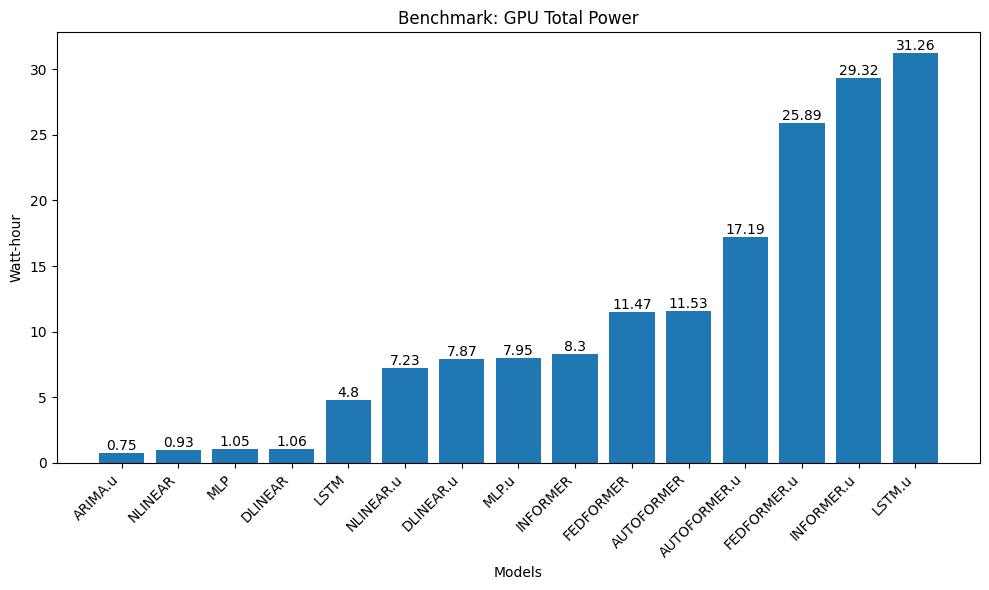

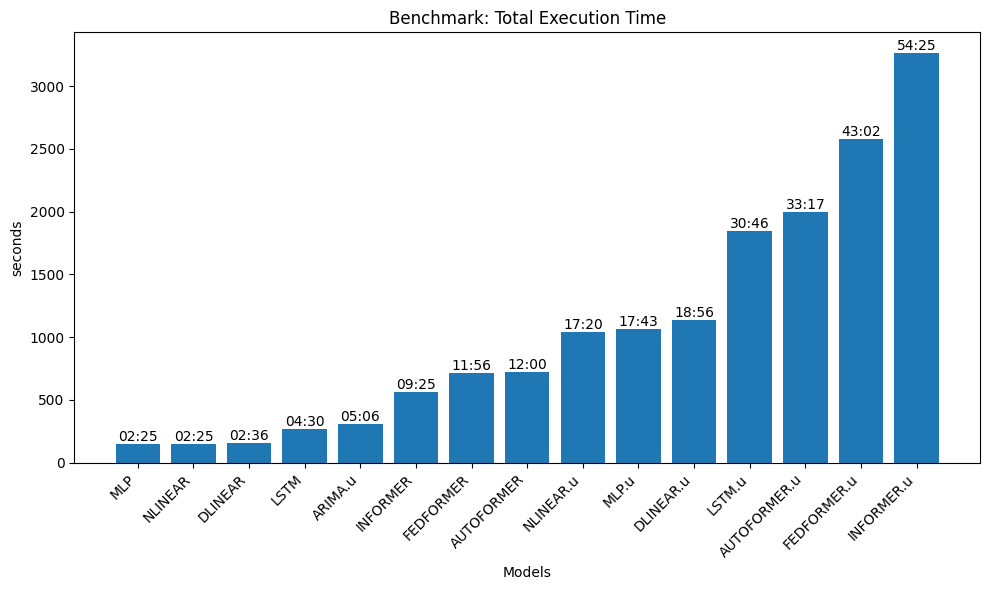

In [ ]:
# prompt: Using dataframe benchmark_df: create a method that plots only one
#         column of benchmark, this columns must be ordered, plot with a bar
#         using matplotlib. show value on graph
import matplotlib.pyplot as plt

def plot_benchmark_column(df, column_name, title, ylabel, format=lambda x: x):

  # Create the bar plot
  plt.figure(figsize=(10, 6))
  plt.bar(df.model, df[column_name])
  plt.xlabel('Models')
  plt.ylabel(ylabel)
  plt.title(f'Benchmark: {title}')
  plt.xticks(rotation=45, ha='right')

  # Add value labels on top of each bar
  for index, value in enumerate(df[column_name]):
      plt.text(index, value, format(value), ha='center', va='bottom')

  plt.tight_layout()
  plt.savefig(latex_folder + 'benchmark_' + column_name + '.png')
  plt.show()

# prompt: create an example calling copy_df using gpusage and changint the values to integer
cp_df = copy_df(benchmark_df, 'gpusage')
plot_benchmark_column(cp_df, 'gpusage', 'Max GPU Usage (%)', '%', format=lambda x: int(x))

# prompt: create an example calling copy_df using gpu_power_wh and format the values to 2 decimals
cp_df = copy_df(benchmark_df, 'gpu_power_wh')
plot_benchmark_column(cp_df, 'gpu_power_wh', 'GPU Total Power', 'Watt-hour', format=lambda x: round(x, 2))

# prompt: create an example calling copy_df using exec_time and format the values to min:sec format, without hour
cp_df = copy_df(benchmark_df, 'exec_time')
plot_benchmark_column(cp_df, 'exec_time', 'Total Execution Time', 'seconds', format=lambda x: time.strftime('%M:%S', time.gmtime(x)))

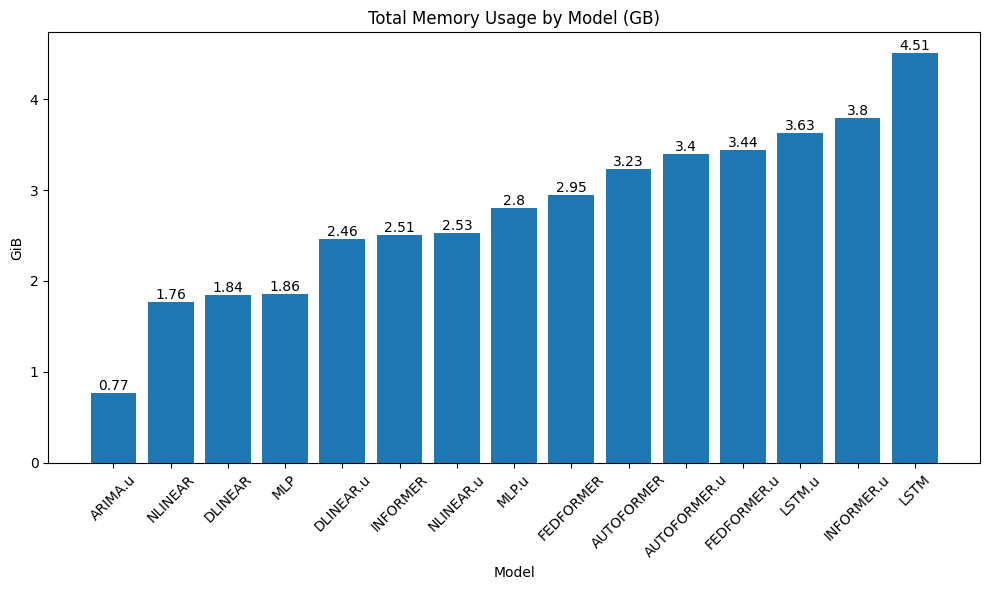

In [ ]:
# prompt: Using dataframe benchmark_df: create a new dataframe memory_df with
#         model and a new column total_memory from the sum of mem_gb and
#         gpumem_gb, order by total_memory. plot memory_df with a bar using
#         matplotlib. show memory value on graph

# Create a new dataframe with model and total memory
memory_df = benchmark_df.copy()
memory_df['total_memory'] = memory_df['mem_gb'] + memory_df['gpumem_gb']
memory_df = memory_df[['model', 'total_memory']].sort_values('total_memory')

# Plotting the dataframe with a bar chart using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(memory_df['model'], memory_df['total_memory'])
plt.xlabel('Model')
plt.ylabel('GiB')
plt.title('Total Memory Usage by Model (GB)')
plt.xticks(rotation=45)

# Add memory values on the graph
for i, value in enumerate(memory_df['total_memory']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.tight_layout()
plt.savefig(latex_folder + 'benchmark_total_mem.png')
plt.show()

###LATEX

`.csv` and `.tex` table with used resources by each models

In [ ]:
# prompt: save benchmark_df as a csv and latex table file
benchmark_df.to_csv(latex_folder + 'benchmark.csv', index=False)

latex_table = latex_benchmark_df.to_latex(index=False)

with open(latex_folder + 'benchmark.tex', 'w') as f:
  f.write(latex_table)

latex_benchmark_df

,model,cpusage,mem_gb,gpusage,gpumem_gb,gpu_power_wh,exec_time
0,ARIMA.u,91.9,0.77,0.0,0.000000,0.746689,306
1,LSTM,98.4,2.17,93.0,2.339844,4.798594,270
2,LSTM.u,75.0,2.47,90.0,1.163086,31.257944,1846
3,MLP,98.4,1.61,19.0,0.250000,1.047514,145
4,MLP.u,98.4,2.40,18.0,0.403320,7.951192,1063
5,DLINEAR,98.4,1.60,8.0,0.240234,1.057147,156
6,DLINEAR.u,98.4,2.10,6.0,0.360352,7.873475,1136
7,NLINEAR,98.4,1.55,6.0,0.212891,0.931806,145
8,NLINEAR.u,87.1,2.17,6.0,0.360352,7.230233,1040
9,INFORMER,98.3,1.95,61.0,0.556641,8.295717,565


---
#Metrics

In [ ]:
# Calculate MAE, RSME and POCID for the current model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def pocid(actual, forecast):
  actual = np.array(actual)
  forecast = np.array(forecast)
  sum_abs_diff = np.sum(np.abs(actual - forecast))
  sum_actual = np.sum(actual)
  return (sum_abs_diff / sum_actual) * 100

results = []
for col in test_df.columns[1:]:
  mae = mean_absolute_error(test_df[col], pred_df[col])
  rmse = np.sqrt(mean_squared_error(test_df[col], pred_df[col]))
  pocid_val = pocid(test_df[col], pred_df[col])
  results.append([col, mae, rmse, pocid_val])

results_df = pd.DataFrame(results, columns=['Asset', 'MAE', 'RMSE', 'POCID'])
# results_df

In [ ]:
# Add mean and std in separate MAE, RSME and POCID df
try:
  mae_df
except NameError:
  mae_df = pd.DataFrame(columns=['model', 'mean', 'std'])
  rmse_df = pd.DataFrame(columns=['model', 'mean', 'std'])
  pocid_df = pd.DataFrame(columns=['model', 'mean', 'std'])

new_mae_row = {'model': model_name.upper() + update_mode, 'mean': results_df['MAE'].mean(), 'std': results_df['MAE'].std()}
new_rmse_row = {'model': model_name.upper() + update_mode, 'mean': results_df['RMSE'].mean(), 'std': results_df['RMSE'].std()}
new_pocid_row = {'model': model_name.upper() + update_mode, 'mean': results_df['POCID'].mean(), 'std': results_df['POCID'].std()}

mae_df = mae_df._append(new_mae_row, ignore_index=True)
rmse_df = rmse_df._append(new_rmse_row, ignore_index=True)
pocid_df = pocid_df._append(new_pocid_row, ignore_index=True)

display(mae_df)
display(rmse_df)
display(pocid_df)

,model,mean,std
0,ARIMA.u,0.842899,1.138536
1,LSTM,1.374797,1.978069
2,LSTM.u,2.095097,3.523333
3,MLP,1.554159,2.111918
4,MLP.u,0.839146,1.133707
5,DLINEAR,1.240809,1.883897
6,DLINEAR.u,1.255833,1.580106
7,NLINEAR,1.678588,2.272365
8,NLINEAR.u,0.837968,1.133717
9,INFORMER,1.488662,2.099116


,model,mean,std
0,ARIMA.u,1.189664,1.636216
1,LSTM,1.729649,2.424934
2,LSTM.u,3.255283,5.913472
3,MLP,2.041288,2.778709
4,MLP.u,1.184029,1.631968
5,DLINEAR,1.688662,2.508649
6,DLINEAR.u,1.899185,2.362769
7,NLINEAR,2.081107,2.849880
8,NLINEAR.u,1.186966,1.629160
9,INFORMER,1.848349,2.661494


,model,mean,std
0,ARIMA.u,0.638114,0.433348
1,LSTM,1.088500,0.900270
2,LSTM.u,1.284908,0.697961
3,MLP,1.088541,0.621571
4,MLP.u,0.632230,0.395356
5,DLINEAR,0.945322,0.663025
6,DLINEAR.u,0.917488,0.382027
7,NLINEAR,1.251303,0.887417
8,NLINEAR.u,0.632320,0.397082
9,INFORMER,1.089597,0.657080


In [ ]:
# prompt: create a method that may receives mae_df, rmse_df or pocid_df and plot
#         a bar graph with mean and standard deviation for each model so that
#         mean and std are shown in each column
import matplotlib.pyplot as plt

def plot_metrics_with_error_bars(df, metric):
  plt.figure(figsize=(10, 5))
  for i in range(len(df)):
      plt.bar(df['model'].iloc[i], df['mean'].iloc[i], yerr=df['std'].iloc[i], capsize=5)
      plt.text(df['model'].iloc[i], df['mean'].iloc[i] + df['std'].iloc[i],
               f"Mean: {df['mean'].iloc[i]:.2f}\nStd: {df['std'].iloc[i]:.2f}",
               ha='center', va='bottom', fontsize=8)
  plt.xlabel('Model')
  plt.ylabel(metric)
  plt.title(metric)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.savefig(latex_folder + 'metrics_' + metric + '.png')
  plt.show()

In [ ]:
# prompt: reorder mae_df, rmse_df and pocid_df by mean
reordered_mae_df = mae_df.sort_values('mean')
reordered_rmse_df = rmse_df.sort_values('mean')
reordered_pocid_df = pocid_df.sort_values('mean')

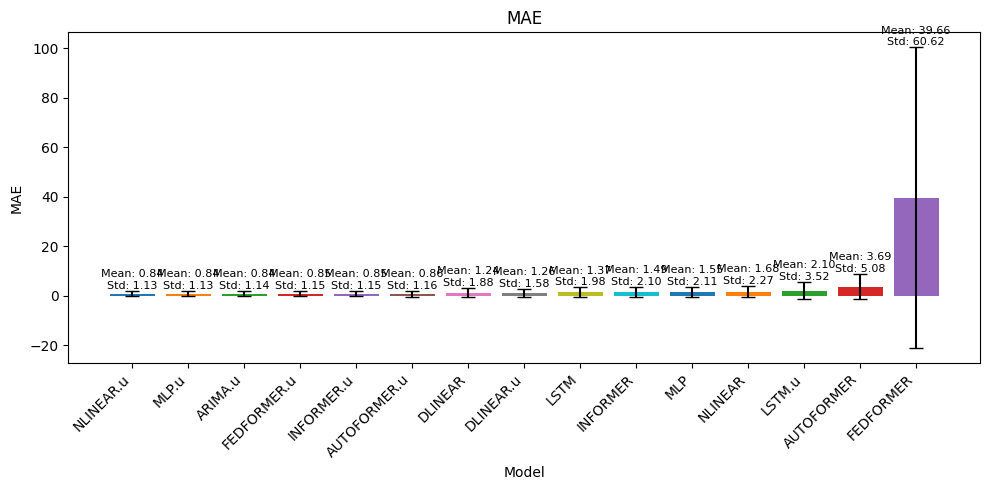

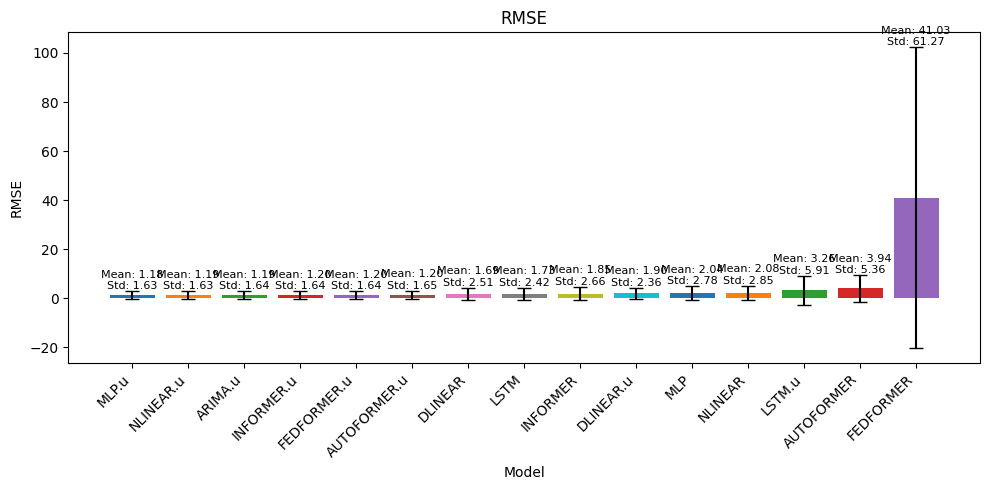

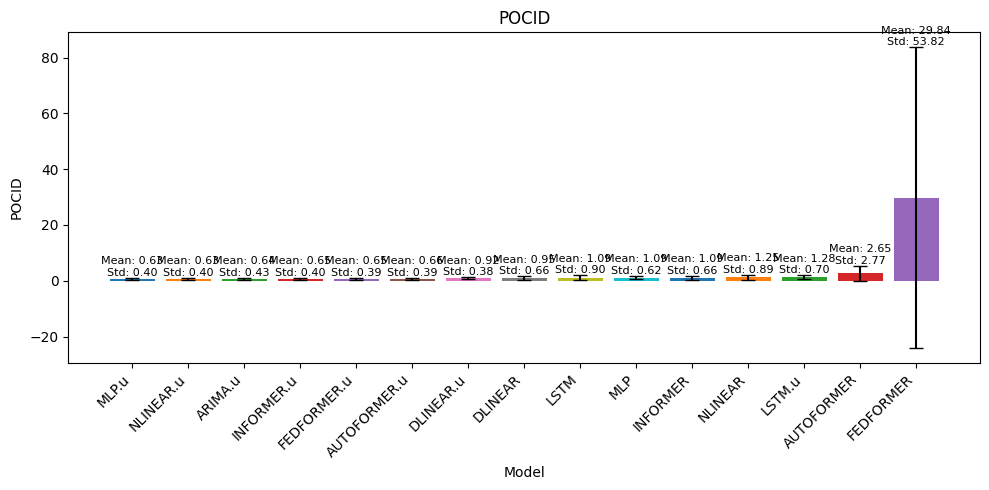

In [ ]:
plot_metrics_with_error_bars(reordered_mae_df, 'MAE')
plot_metrics_with_error_bars(reordered_rmse_df, 'RMSE')
plot_metrics_with_error_bars(reordered_pocid_df, 'POCID')

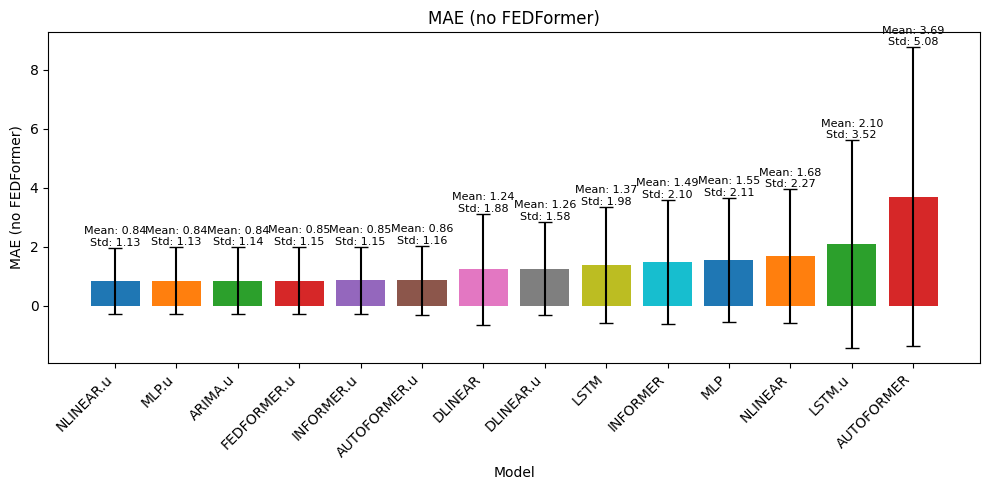

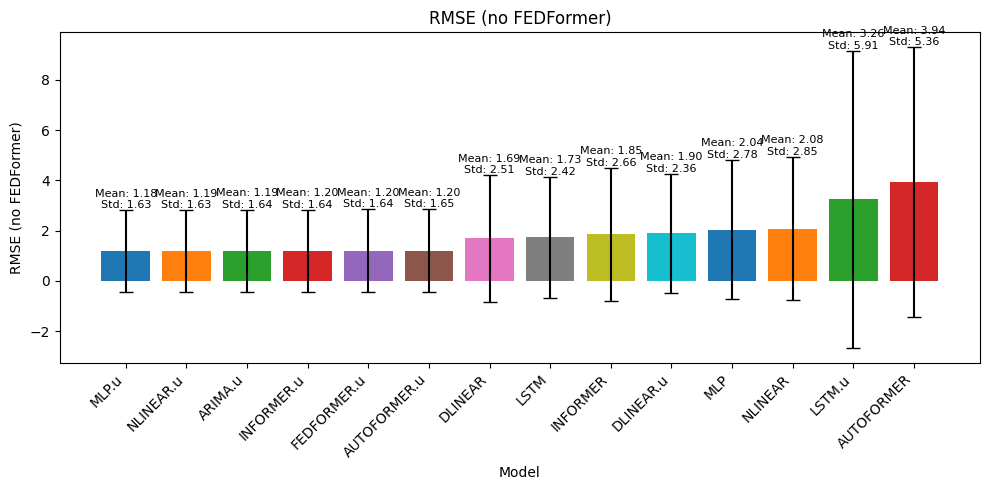

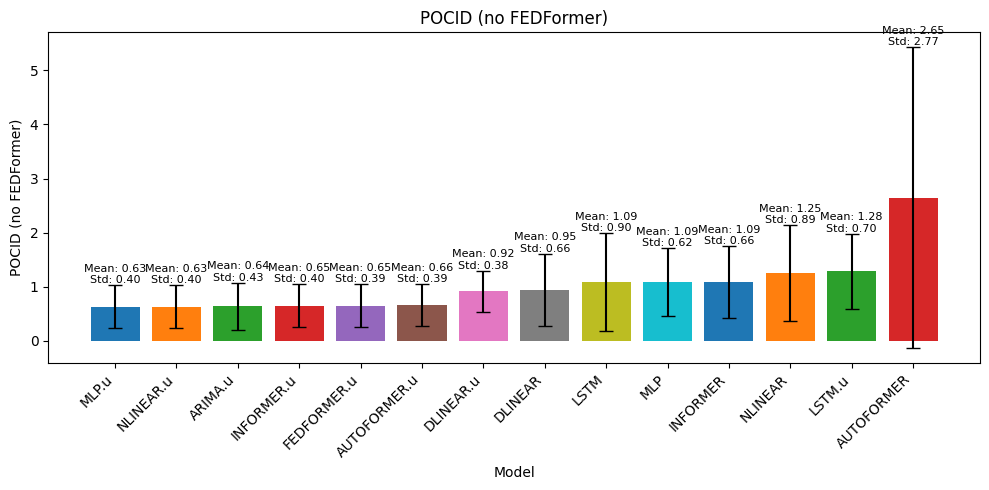

In [ ]:
# Removing FEDFormer without update bcs its too high
plot_metrics_with_error_bars(reordered_mae_df.drop(index=reordered_mae_df.iloc[14].name), 'MAE (no FEDFormer)')
plot_metrics_with_error_bars(reordered_rmse_df.drop(index=reordered_mae_df.iloc[14].name), 'RMSE (no FEDFormer)')
plot_metrics_with_error_bars(reordered_pocid_df.drop(index=reordered_mae_df.iloc[14].name), 'POCID (no FEDFormer)')

###LATEX

In [ ]:
# Creates only one dataframe with MAE, RSME and POCID for genetaring latex table
try:
  metrics_df
except NameError:
  metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'POCID'])

new_metrics_row = {'Model': model_name.upper() + update_mode,
                   'MAE': f2d(results_df['MAE'].mean()) + ' \pm' + f2d(results_df['MAE'].std()),
                   'RMSE': f2d(results_df['RMSE'].mean()) + ' \pm' + f2d(results_df['RMSE'].std()),
                   'POCID': f2d(results_df['POCID'].mean()) + ' \pm' + f2d(results_df['POCID'].std())}

metrics_df = metrics_df._append(new_metrics_row, ignore_index=True)

metrics_df

,Model,MAE,RMSE,POCID
0,ARIMA.u,0.84 \pm1.14,1.19 \pm1.64,0.64 \pm0.43
1,LSTM,1.37 \pm1.98,1.73 \pm2.42,1.09 \pm0.90
2,LSTM.u,2.10 \pm3.52,3.26 \pm5.91,1.28 \pm0.70
3,MLP,1.55 \pm2.11,2.04 \pm2.78,1.09 \pm0.62
4,MLP.u,0.84 \pm1.13,1.18 \pm1.63,0.63 \pm0.40
5,DLINEAR,1.24 \pm1.88,1.69 \pm2.51,0.95 \pm0.66
6,DLINEAR.u,1.26 \pm1.58,1.90 \pm2.36,0.92 \pm0.38
7,NLINEAR,1.68 \pm2.27,2.08 \pm2.85,1.25 \pm0.89
8,NLINEAR.u,0.84 \pm1.13,1.19 \pm1.63,0.63 \pm0.40
9,INFORMER,1.49 \pm2.10,1.85 \pm2.66,1.09 \pm0.66


###LATEX

In [ ]:
# prompt: save metrics_df as latex table

metrics_df.to_csv(latex_folder + 'metrics.csv', index=False)

latex_table = metrics_df.to_latex(index=False)

with open(latex_folder + 'metrics.tex', 'w') as f:
  f.write(latex_table)

---
#Individual predition plots

In [ ]:
# prompt: Using dataframe results_df: add in a list n top asset names for each column and in another list n bottom names for each column
n = 2

# Find the top (lowest scores) n assets for each metric
top_mae = results_df.nsmallest(n, 'MAE')['Asset'].tolist()
top_rmse = results_df.nsmallest(n, 'RMSE')['Asset'].tolist()
top_pocid = results_df.nsmallest(n, 'POCID')['Asset'].tolist()

# Find the bottom n (highest scores) assets for each metric
bottom_mae = results_df.nlargest(n, 'MAE')['Asset'].tolist()
bottom_rmse = results_df.nlargest(n, 'RMSE')['Asset'].tolist()
bottom_pocid = results_df.nlargest(n, 'POCID')['Asset'].tolist()

# Print the results
print(f"Top {n} Assets by MAE: {top_mae}")
print(f"Top {n} Assets by RMSE: {top_rmse}")
print(f"Top {n} Assets by POCID: {top_pocid}")
print(f"Bottom {n} Assets by MAE: {bottom_mae}")
print(f"Bottom {n} Assets by RMSE: {bottom_rmse}")
print(f"Bottom {n} Assets by POCID: {bottom_pocid}")

# prompt: add in one list all top assets and in another all botton assets
all_top_assets = list(set(top_mae + top_rmse + top_pocid))
all_bottom_assets = list(set(bottom_mae + bottom_rmse + bottom_pocid))
print()
print(f"{model_name.upper()} top assets: {all_top_assets}")
print(f"{model_name.upper()} bottom assets: {all_bottom_assets}")

# prompt: add 'Date' at the start of all_top_assets and all_botton_assets lists
date_str = ['Date']  # Assuming 'Date' is the first column
all_top_assets_with_date = date_str + all_top_assets
all_bottom_assets_with_date = date_str + all_bottom_assets
print()
print(f"All top assets with date: {all_top_assets_with_date}")
print(f"All bottom assets with date: {all_bottom_assets_with_date}")


Top 2 Assets by MAE: ['IEAA.L', 'HIGH.L']
Top 2 Assets by RMSE: ['HIGH.L', 'IEAA.L']
Top 2 Assets by POCID: ['SHY', 'WRK']
Bottom 2 Assets by MAE: ['URI', 'DPZ']
Bottom 2 Assets by RMSE: ['URI', 'DPZ']
Bottom 2 Assets by POCID: ['VXX', 'OGN']

FEDFORMER top assets: ['SHY', 'WRK', 'HIGH.L', 'IEAA.L']
FEDFORMER bottom assets: ['VXX', 'OGN', 'URI', 'DPZ']

All top assets with date: ['Date', 'SHY', 'WRK', 'HIGH.L', 'IEAA.L']
All bottom assets with date: ['Date', 'VXX', 'OGN', 'URI', 'DPZ']


In [ ]:
# prompt: create a top_botton dataframe if it doens't exists with 3 columns: model, top/botton flag and assets. add and example row based on previous output
try:
  top_bottom_df
except NameError:
  top_bottom_df = pd.DataFrame(columns=['model', 'top_bottom', 'metric', 'assets'])

new_top_mae_row = {'model': model_name.upper() + update_mode, 'top_bottom': 'top', 'metric': 'mae', 'assets': top_mae}
new_top_rmse_row = {'model': model_name.upper() + update_mode, 'top_bottom': 'top', 'metric': 'rmse', 'assets': top_rmse}
new_top_pocid_row = {'model': model_name.upper() + update_mode, 'top_bottom': 'top', 'metric': 'pocid', 'assets': top_pocid}
new_bot_mae_row = {'model': model_name.upper() + update_mode, 'top_bottom': 'bottom', 'metric': 'mae', 'assets': bottom_mae}
new_bot_rmse_row = {'model': model_name.upper() + update_mode, 'top_bottom': 'bottom', 'metric': 'rmse', 'assets': bottom_rmse}
new_bot_pocid_row = {'model': model_name.upper() + update_mode, 'top_bottom': 'bottom', 'metric': 'pocid', 'assets': bottom_pocid}

top_bottom_df = top_bottom_df._append(new_top_mae_row, ignore_index=True)
top_bottom_df = top_bottom_df._append(new_top_rmse_row, ignore_index=True)
top_bottom_df = top_bottom_df._append(new_top_pocid_row, ignore_index=True)
top_bottom_df = top_bottom_df._append(new_bot_mae_row, ignore_index=True)
top_bottom_df = top_bottom_df._append(new_bot_rmse_row, ignore_index=True)
top_bottom_df = top_bottom_df._append(new_bot_pocid_row, ignore_index=True)

top_bottom_df

,model,top_bottom,metric,assets
0,ARIMA.u,top,mae,"[WRK, IEAA.L]"
1,ARIMA.u,top,rmse,"[WRK, IEAA.L]"
2,ARIMA.u,top,pocid,"[WRK, IEAA.L]"
3,ARIMA.u,bottom,mae,"[URI, DPZ]"
4,ARIMA.u,bottom,rmse,"[URI, DPZ]"
...,...,...,...,...
85,FEDFORMER.u,top,rmse,"[HIGH.L, IEAA.L]"
86,FEDFORMER.u,top,pocid,"[SHY, WRK]"
87,FEDFORMER.u,bottom,mae,"[URI, DPZ]"
88,FEDFORMER.u,bottom,rmse,"[URI, DPZ]"


In [ ]:
# prompt: Using dataframe top_bottom_df: save in a file as a latex table
# Convert the dataframe to a LaTeX table
latex_tb_table = top_bottom_df.to_latex(index=False)

# Save the LaTeX table to a file
with open(latex_folder + "top_bottom_table.tex", "w") as f:
    f.write(latex_tb_table)

# prompt: Using dataframe top_bottom_df: save in a csv file
# Save the dataframe to a CSV file named 'top_bottom_df.csv'
top_bottom_df.to_csv(latex_folder + 'top_bottom_df.csv', index=False)

In [ ]:
# prompt: rewrite plot_pred_vs_test so all graphs are in the same image on 2 columns

def plot_pred_vs_test_2(test_df, preds, filename=''):
  num_cols = 2  # Number of columns in the subplot
  num_rows = (len(test_df.columns) - 1 + num_cols - 1) // num_cols  # Calculate the number of rows needed

  fig = plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size as needed

  for i, col in enumerate(test_df.columns[1:]):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.plot(test_df['Date'], test_df[col], label='Test')
    ax.plot(preds['Date'], preds[col], label='Predictions')
    ax.set_title(col)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

  plt.tight_layout()

  if filename != '':
    plt.savefig(filename + '.png')

  plt.show()


---
# LATEX

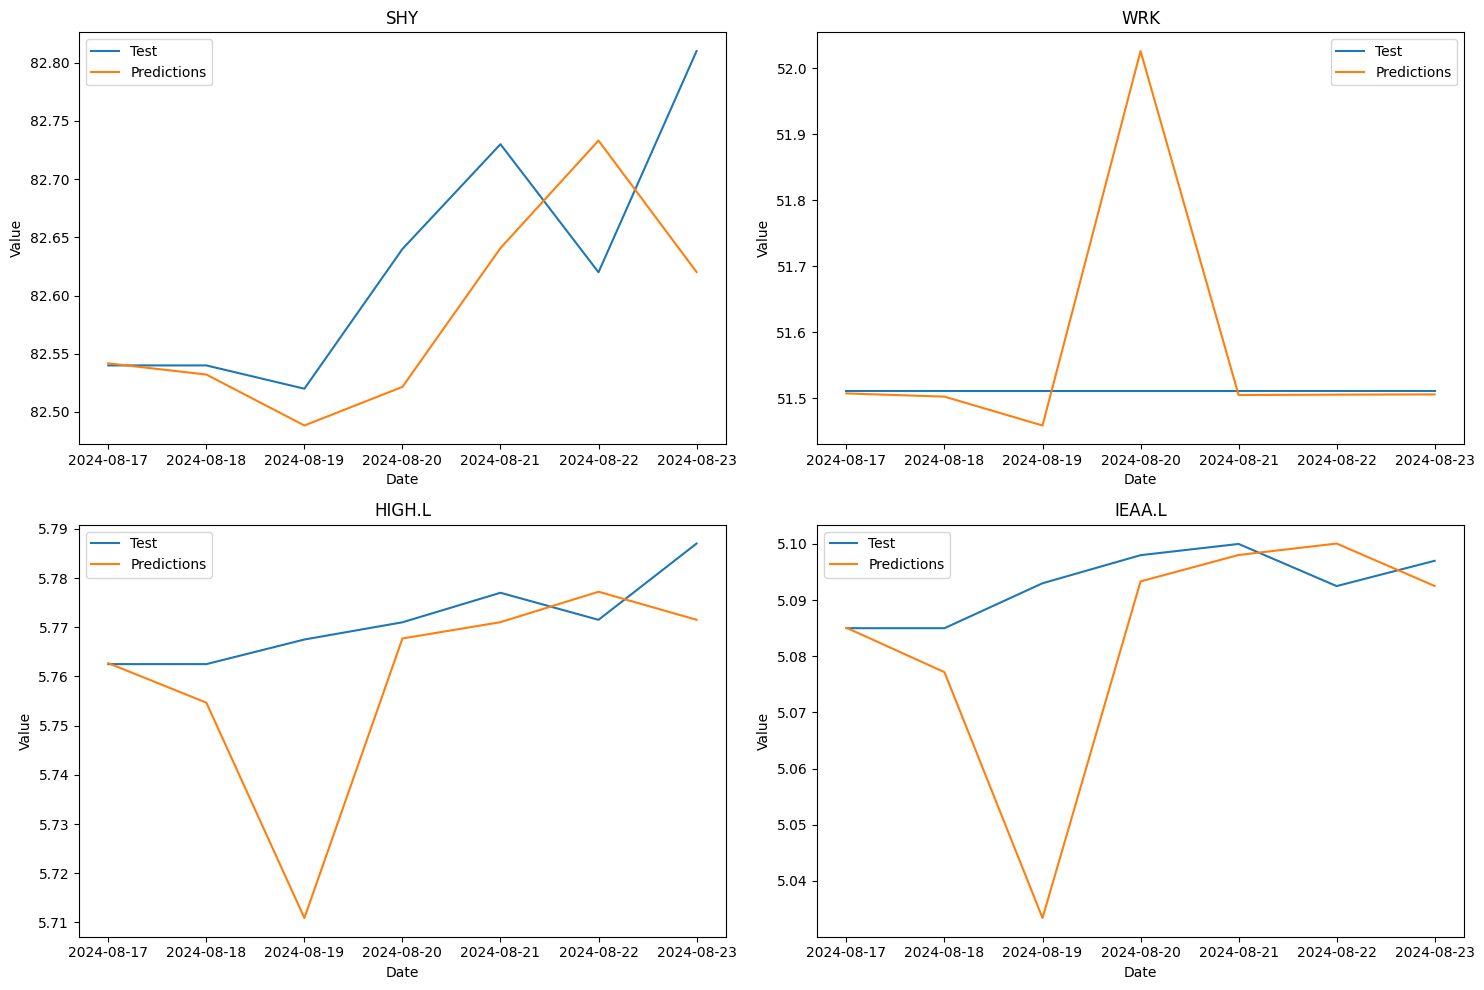

In [ ]:
plot_pred_vs_test_2(test_df[all_top_assets_with_date], pred_df[all_top_assets_with_date], latex_folder + 'pred_' + model_name + update_mode + '_top')

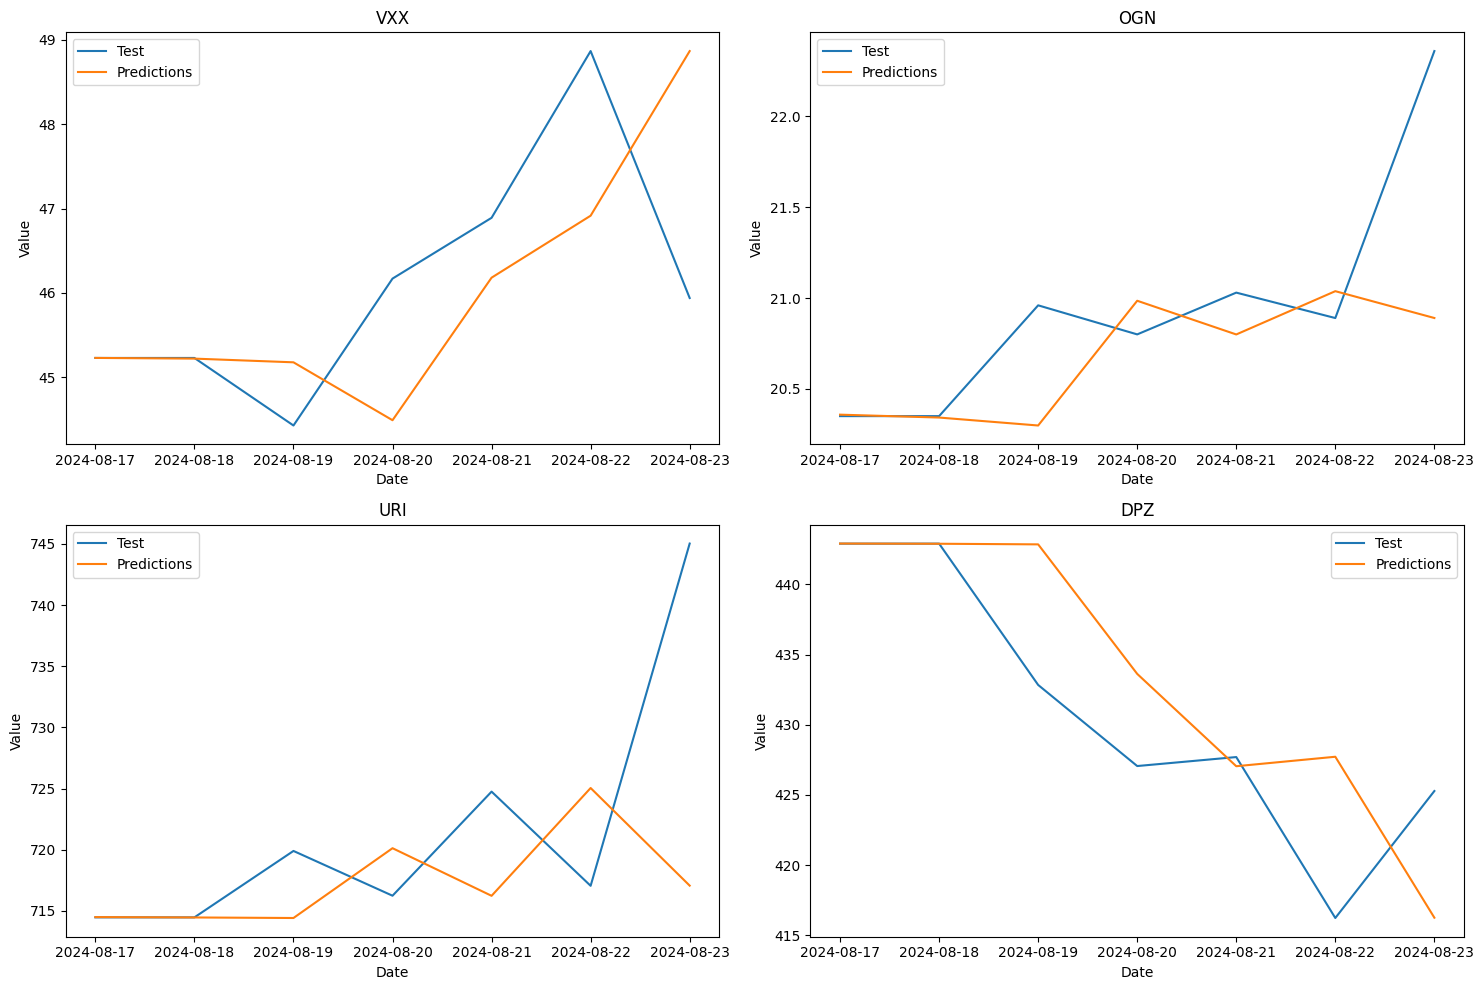

In [ ]:
plot_pred_vs_test_2(test_df[all_bottom_assets_with_date], pred_df[all_bottom_assets_with_date], latex_folder + 'pred_' + model_name + update_mode + '_bottom')

In [ ]:
import IPython
IPython.display.Audio(folder + "../notebooks/boing.mp3", autoplay=True)